<a href="https://colab.research.google.com/github/Amir-Shakiba/image-generation/blob/AE-MNIST/simple_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
inputs = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.Dense(64)(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dense(784)(x)
outputs = tf.keras.layers.Reshape((28,28,1))(x)
ae_model = tf.keras.Model(inputs,outputs)
ae_model.compile(optimizer="adam", loss="mse")

In [10]:
ae_model.fit(x= x_train,y = x_train,epochs = 3)


Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0135
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0098
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0097


(8, 28, 28, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'renderer' parameter of tight_layout() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'renderer', they should be pass as keyword, not positionally.


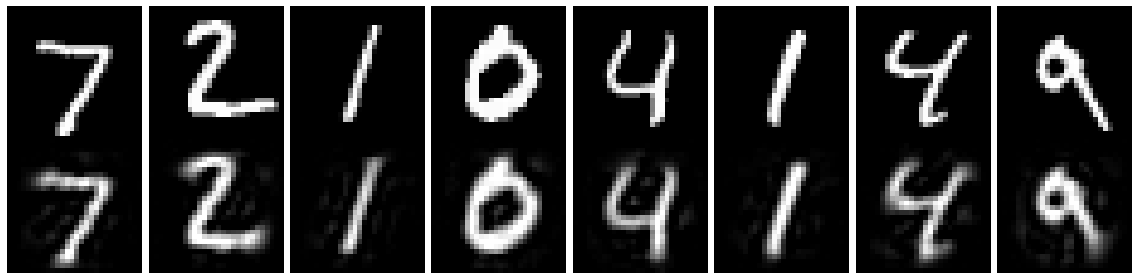

In [11]:
images = x_test[:8]
outputs = ae_model.predict(images)
print(outputs.shape)

grid_col = 8
grid_row = 2

f, axarr = plt.subplots(grid_row, grid_col, figsize=(grid_col*2, grid_row*2))

i = 0
for row in range(0, grid_row, 2):
    for col in range(grid_col):
        axarr[row,col].imshow(images[i],cmap='gray')
        axarr[row,col].axis('off')
        axarr[row+1,col].imshow(np.clip(outputs[i,:,:,0],0,1),cmap='gray')
        axarr[row+1,col].axis('off')        
        i += 1
f.tight_layout(0.1, h_pad=0.2, w_pad=0.1)        
plt.show()